# South Station Study
## 00_Data Collection
* Collect data from the Google Places API for venues and amenities around a project site.
* Use the popoluartimes library developed by m-wrzr and found here: https://github.com/m-wrzr/populartimes

In [2]:
#import libraries
import urllib.request
from urllib.request import urlopen
import json

#define api key
#obtain this from your Google developer portal
with open('keyfile.txt', 'r') as keyfile:
    google_key = keyfile.read()[:-1]

In [3]:
#define list of coordinates around the site we want to check
list_of_coords = [(42.352058, -71.055552),
                  (42.350126, -71.056784),
                  (42.348540, -71.057470),
                  (42.350110, -71.059786),
                  (42.351950, -71.057749)] 

#define list of venue types to search
#the Google Places API has a set list of place types
#listed here: https://developers.google.com/places/supported_types

list_of_venue_types = ['accounting','airport','atm','bakery','bank','bar','beauty_salon','bicycle_store',
                       'book_store','bus_station','cafe','car_repair','church','clothing_store','convenience_store',
                       'courthouse','dentist','doctor','electronics_store','fire_station','florist','furniture',
                       'gas_station','gym,hair_care','hardware_store','home_goods_store','jewelry_store','laundry',
                       'library','liquor_store','lodging,meal_delivery','meal_takeaway','mosque','museum','night_club',
                       'painter','park','parking','pet_store','pharmacy','physiotherapist','plumber','police',
                       'post_office','real_estate_agency','restaurant','school','shoe_store','shopping_mall','spa',
                       'storage','store','subway_station','supermarket','synagogue','taxi_stand','transit_station',
                       'travel_agency','veterinary_care']

#rank our search results by distance
rank_by = "distance"

In [4]:
#now we will loop through each location in our list of coordinates
#and search for venues of each type in our list of venues

#initialize empty dictionary and counter to store results
local_venues = {} 
counter = 0 

#begin loop for our search
for coordinates in list_of_coords: 
    search_lat = coordinates[0] 
    search_lng = coordinates[1] 
    for venue_type in list_of_venue_types: 
        #call the GooglePlacesSearch function.
        #this function will take your search lat and lng,
        #the venue type, and storage dictionary,
        #search the API, and store the results
        search_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?location={},{}&rankby={}&key={}&type={}".format(search_lat,search_lng, rank_by, google_key, venue_type) 
        
        #page 1
        #search
        try:
            urlData = search_url
            webURL = urllib.request.urlopen(urlData)
            data = webURL.read()
            #print(data)
            encoding = webURL.info().get_content_charset('utf-8')
            response = json.loads(data.decode(encoding))
            #save to venues dictionary
            #counter = 0
            for item in response['results']:
                venue = {
                    'name' : item['name'],
                    'type' : item['types'],
                    'lat' : item['geometry']['location']['lat'],
                    'long' : item['geometry']['location']['lng'],
                    'id' : item['place_id']}
                local_venues['item_{}'.format(counter)] = venue
                counter += 1
        except:
            #print("*************")
            #print("passed")
            #print("*************")
            pass
        #print("SEARCH LOCATION: ", coordinates)
        #print("SEARCH V TYPE: ", venue_type)
        #print(counter)
        #print(venues)
        #print("---------------------------------------------------------------")
        
        #page 2
        #search
        try:
            urlData = search_url + "&pagetoken=" + response["next_page_token"]
            webURL = urllib.request.urlopen(urlData)
            data = webURL.read()
            encoding = webURL.info().get_content_charset('utf-8')
            response2 = json.loads(data.decode(encoding))
            #save to venues dictionary
            #counter = 20
            for item in response2['results']:
                venue = {
                    'name' : item['name'],
                    'type' : item['types'],
                    'lat' : item['geometry']['location']['lat'],
                    'long' : item['geometry']['location']['lng'],
                    'id' : item['place_id']}
                local_venues['item_{}'.format(counter)] = venue
                counter += 1
        except:
            #print("*************")
            #print("passed")
            #print("*************")
            pass
        #print("SEARCH LOCATION: ", coordinates)
        #print("SEARCH V TYPE: ", venue_type)
        #print(counter)
        #print(venues)
        #print("---------------------------------------------------------------")
            
        #page 3
        #search
        try:
            urlData = search_url + "&pagetoken=" + response2["next_page_token"]
            webURL = urllib.request.urlopen(urlData)
            data = webURL.read()
            encoding = webURL.info().get_content_charset('utf-8')
            response3 = json.loads(data.decode(encoding))
            #save to venues dictionary
            #counter = 40
            for item in response3['results']:
                venue = {
                    'name' : item['name'],
                    'type' : item['types'],
                    'lat' : item['geometry']['location']['lat'],
                    'long' : item['geometry']['location']['lng'],
                    'id' : item['place_id']}
                local_venues['item_{}'.format(counter)] = venue
                counter += 1
        except:
            #print("*************")
            #print("passed")
            #print("*************")
            pass
        #print("SEARCH LOCATION: ", coordinates)
        #print("SEARCH V TYPE: ", venue_type)
        #print(counter)
        #print(venues)
        #print("---------------------------------------------------------------")
        
print("Search Complete. Found and saved {} venues in the venues dictionary".format(len(local_venues)))

Search Complete. Found and saved 5754 venues in the venues dictionary


In [5]:
local_venues['item_0']

{'id': 'ChIJddqFA4Jw44kRHz6p3qWTs4c',
 'lat': 42.352366,
 'long': -71.056066,
 'name': 'McMahon & Associates, PC',
 'type': ['accounting',
  'lawyer',
  'finance',
  'point_of_interest',
  'establishment']}

In [38]:
#Finally, we will save our search results into
#a pandas dataframe
import pandas as pd

#extract keys from data for iteration
keys = []
for key in local_venues.keys():
    keys.append(key) 


#for each key ("venue") in search results
#preapare and sructure data for dataframe
venue_lat = []
venue_lng = []
venue_name = []
venue_id = []
venue_types = []
for i in range(len(local_venues)):
    lat = local_venues[keys[i]]['lat']
    lng = local_venues[keys[i]]['long']
    name = local_venues[keys[i]]['name']
    GoogleID = local_venues[keys[i]]['id']
    venue_type = str(local_venues[keys[i]]['type'])
    
    venue_lat.append(lat)
    venue_lng.append(lng)
    venue_name.append(name)
    venue_id.append(GoogleID)
    venue_types.append(venue_type)
    
#create new dataframe
df = pd.DataFrame()
df['name'] = venue_name
df['lat'] = venue_lat
df['long'] = venue_lng
df['google_id'] = venue_id
df['venue_type'] = venue_types

df.head()

,name,lat,long,google_id,venue_type
0,"McMahon & Associates, PC",42.352366,-71.056066,ChIJddqFA4Jw44kRHz6p3qWTs4c,"['accounting', 'lawyer', 'finance', 'point_of_..."
1,"Barclay Damon, LLP",42.352321,-71.056248,ChIJD75e1YBw44kRvDZoMEj44jY,"['accounting', 'lawyer', 'finance', 'point_of_..."
2,Request Health Corporation,42.351584,-71.056269,ChIJv1J9rnh644kR4hc29XVaEFg,"['accounting', 'finance', 'point_of_interest',..."
3,StackUp,42.351586,-71.056323,ChIJY_v-pXh744kRub1hj4RNwkk,"['accounting', 'finance', 'point_of_interest',..."
4,KPMG,42.351781,-71.056737,ChIJDaRRe4Jw44kRjXWBXIsFgj0,"['accounting', 'finance', 'point_of_interest',..."


In [39]:
#check length
len(df)

5754

In [40]:
import geopandas as gpd
import pysal as ps
from pysal.contrib.viz import mapping as maps
import matplotlib.pyplot as plt

In [41]:
shapefile_path = '../resources/Hydrography_Polygon.shp'
shapefile = gpd.read_file(shapefile_path) #shapefile of boston waterway

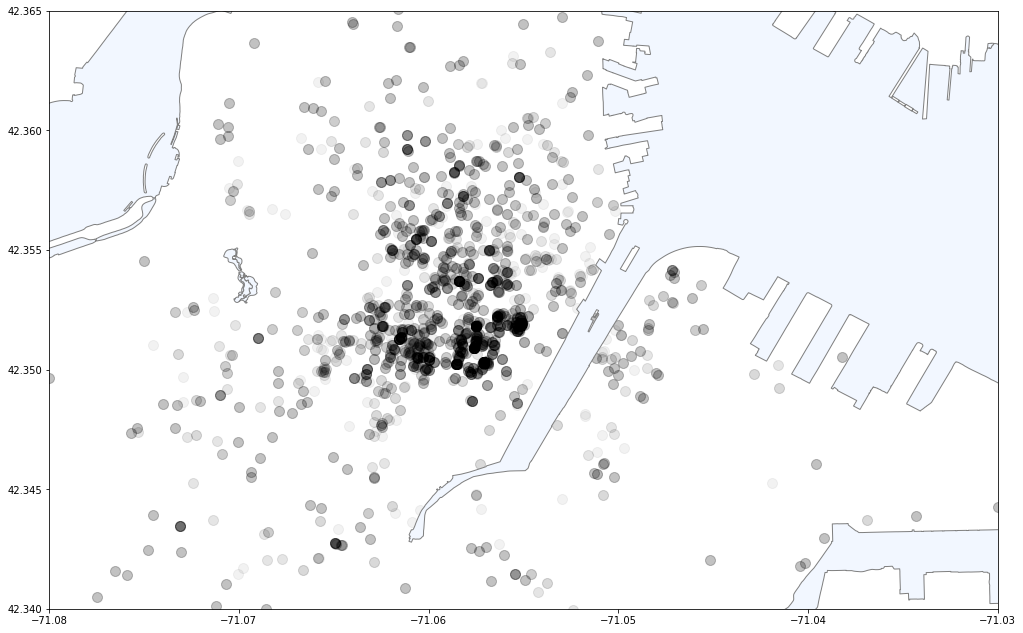

In [42]:
#define plot size
f, ax = plt.subplots(1, figsize=[17, 11])

plt.scatter(df['long'], df['lat'], c='#000000', alpha=0.05, s=100)
ax = shapefile.plot(ax=ax,alpha=1,edgecolor='grey',facecolor='#f2f7ff')
plt.xlim(-71.08,-71.03)
plt.ylim(42.34,42.365)
plt.show()

### gather popular time data for each location

In [43]:
#import libraries
import populartimes

In [44]:
df.head()

,name,lat,long,google_id,venue_type
0,"McMahon & Associates, PC",42.352366,-71.056066,ChIJddqFA4Jw44kRHz6p3qWTs4c,"['accounting', 'lawyer', 'finance', 'point_of_..."
1,"Barclay Damon, LLP",42.352321,-71.056248,ChIJD75e1YBw44kRvDZoMEj44jY,"['accounting', 'lawyer', 'finance', 'point_of_..."
2,Request Health Corporation,42.351584,-71.056269,ChIJv1J9rnh644kR4hc29XVaEFg,"['accounting', 'finance', 'point_of_interest',..."
3,StackUp,42.351586,-71.056323,ChIJY_v-pXh744kRub1hj4RNwkk,"['accounting', 'finance', 'point_of_interest',..."
4,KPMG,42.351781,-71.056737,ChIJDaRRe4Jw44kRjXWBXIsFgj0,"['accounting', 'finance', 'point_of_interest',..."


In [45]:
import warnings
warnings.filterwarnings('ignore')
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

#using places from google data search for available popular times data
venues_pop_times = []
for i in range(len(df)):
    id = df.loc[i]['google_id']
    a = populartimes.get_id(google_key, id)
    venues_pop_times.append(a)
    if i % 100 == 0:
        print(((i+1)/(len(df)))*100, "% complete", end="\r")

In [46]:
with open('local_venue_poptimes.json', 'w') as outfile:  
    json.dump(venues_pop_times, outfile, sort_keys=True, indent=4)
    
#save to excel
df.to_excel("../data_archives/df.xlsx")

In [47]:
#only extract places that have pop times data
venues_final = []
for i in range(len(venues_pop_times)):
    try:
        if venues_pop_times[i]['populartimes']:
            venues_final.append(venues_pop_times[i])
    except KeyError:
        pass
print(len(venues_final),"venues have populartimes data")

1254 venues have populartimes data


In [48]:
#add relevent data to datframe
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for day in range(7):
    df[days[day]] = 0
    for venue in venues_final:
        name = venue['name']
        dayOfWeek = venue['populartimes'][day]['name']
        count = sum(venue['populartimes'][day]['data'])
        lat = venue['coordinates']['lat']
        lng = venue['coordinates']['lng']
        idx = venue['id']
        index = df[df['google_id'] == idx].index.values[0]
        
        df.at[index, days[day]] = count
df.head(10)

,name,lat,long,google_id,venue_type,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,"McMahon & Associates, PC",42.352366,-71.056066,ChIJddqFA4Jw44kRHz6p3qWTs4c,"['accounting', 'lawyer', 'finance', 'point_of_...",0,0,0,0,0,0,0
1,"Barclay Damon, LLP",42.352321,-71.056248,ChIJD75e1YBw44kRvDZoMEj44jY,"['accounting', 'lawyer', 'finance', 'point_of_...",0,0,0,0,0,0,0
2,Request Health Corporation,42.351584,-71.056269,ChIJv1J9rnh644kR4hc29XVaEFg,"['accounting', 'finance', 'point_of_interest',...",0,0,0,0,0,0,0
3,StackUp,42.351586,-71.056323,ChIJY_v-pXh744kRub1hj4RNwkk,"['accounting', 'finance', 'point_of_interest',...",0,0,0,0,0,0,0
4,KPMG,42.351781,-71.056737,ChIJDaRRe4Jw44kRjXWBXIsFgj0,"['accounting', 'finance', 'point_of_interest',...",0,0,0,0,0,0,0
5,Baker Newman Noyes,42.353232,-71.056267,ChIJA_c0BIJw44kRC-aqIwcaXdQ,"['accounting', 'finance', 'point_of_interest',...",0,0,0,0,0,0,0
6,Adler Pollock & Sheehan PC,42.353291,-71.056333,ChIJYVdYIoJw44kRP0BOts8EKeQ,"['accounting', 'lawyer', 'finance', 'point_of_...",0,0,0,0,0,0,0
7,Daigle & Associates,42.353588,-71.055850,ChIJjztu9oNw44kRYm6oIVKU4r8,"['accounting', 'finance', 'point_of_interest',...",0,0,0,0,0,0,0
8,"DGC (DiCicco, Gulman & Company LLP)",42.353649,-71.056467,ChIJZSp0PIJw44kRRfNJO3f-31M,"['accounting', 'finance', 'point_of_interest',...",0,0,0,0,0,0,0
9,"Matson, Driscoll & Damico LLP",42.353653,-71.056638,ChIJL45a8Xh644kRCUlKYMwqJck,"['accounting', 'finance', 'point_of_interest',...",0,0,0,0,0,0,0


In [49]:
#sum the week's data for each venue
df['WeekTotals'] = 0
for i in range(len(df)):
    a = []
    for j in range(7):
        count = df.at[i, days[j]]
        a.append(count)
        #print(a)
    df.at[i, 'WeekTotals'] = sum(a)
df.head(10)

,name,lat,long,google_id,venue_type,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,WeekTotals
0,"McMahon & Associates, PC",42.352366,-71.056066,ChIJddqFA4Jw44kRHz6p3qWTs4c,"['accounting', 'lawyer', 'finance', 'point_of_...",0,0,0,0,0,0,0,0
1,"Barclay Damon, LLP",42.352321,-71.056248,ChIJD75e1YBw44kRvDZoMEj44jY,"['accounting', 'lawyer', 'finance', 'point_of_...",0,0,0,0,0,0,0,0
2,Request Health Corporation,42.351584,-71.056269,ChIJv1J9rnh644kR4hc29XVaEFg,"['accounting', 'finance', 'point_of_interest',...",0,0,0,0,0,0,0,0
3,StackUp,42.351586,-71.056323,ChIJY_v-pXh744kRub1hj4RNwkk,"['accounting', 'finance', 'point_of_interest',...",0,0,0,0,0,0,0,0
4,KPMG,42.351781,-71.056737,ChIJDaRRe4Jw44kRjXWBXIsFgj0,"['accounting', 'finance', 'point_of_interest',...",0,0,0,0,0,0,0,0
5,Baker Newman Noyes,42.353232,-71.056267,ChIJA_c0BIJw44kRC-aqIwcaXdQ,"['accounting', 'finance', 'point_of_interest',...",0,0,0,0,0,0,0,0
6,Adler Pollock & Sheehan PC,42.353291,-71.056333,ChIJYVdYIoJw44kRP0BOts8EKeQ,"['accounting', 'lawyer', 'finance', 'point_of_...",0,0,0,0,0,0,0,0
7,Daigle & Associates,42.353588,-71.055850,ChIJjztu9oNw44kRYm6oIVKU4r8,"['accounting', 'finance', 'point_of_interest',...",0,0,0,0,0,0,0,0
8,"DGC (DiCicco, Gulman & Company LLP)",42.353649,-71.056467,ChIJZSp0PIJw44kRRfNJO3f-31M,"['accounting', 'finance', 'point_of_interest',...",0,0,0,0,0,0,0,0
9,"Matson, Driscoll & Damico LLP",42.353653,-71.056638,ChIJL45a8Xh644kRCUlKYMwqJck,"['accounting', 'finance', 'point_of_interest',...",0,0,0,0,0,0,0,0


### Save Data to File

In [50]:
#save to excel
df.to_excel("../data_archives/df.xlsx")

In [51]:
with open('../data_archives/local_venue_poptimes.json', 'w') as outfile:  
    json.dump(venues_final, outfile, sort_keys=True, indent=4)